In [118]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3690047211.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

In [119]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df.shape

(7043, 21)

In [121]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [122]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [123]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [124]:
df.drop(columns='customerID', inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [126]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [127]:
for col in categorical_cols:
    print(df[col].value_counts())
    print('-'*40)


gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
----------------------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
---

In [128]:
df['TotalCharges'].head()

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


In [129]:
df['TotalCharges'].apply(lambda x: not x.replace('.', '', 1).replace(' ', '').isdigit() if isinstance(x, str) else False).sum()

np.int64(11)

In [130]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [131]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [132]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [133]:
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [134]:
categorical_cols.remove('TotalCharges')

In [135]:
for col in categorical_cols:
    print(df[col].value_counts())
    print('-'*40)

gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
----------------------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
---

In [136]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [137]:
df['TotalCharges'].isna().sum()

np.int64(11)

# Handle missing value with regression

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Identifikasi missing
missing_tc = df['TotalCharges'].isna()

# Pisahkan data
train_data = df[~missing_tc].copy()
test_data = df[missing_tc].copy()

# Siapkan fitur
X_train = train_data[['tenure', 'MonthlyCharges']]
y_train = train_data['TotalCharges']
X_test = test_data[['tenure', 'MonthlyCharges']]

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# 🔒 PENANGANAN KEAMANAN: Pastikan hasil imputasi >= 0
y_pred = np.clip(y_pred, a_min=0, a_max=None)  # Force semua nilai >= 0

# Masukkan kembali ke df
df.loc[missing_tc, 'TotalCharges'] = y_pred

# Verifikasi
print("Min TotalCharges setelah imputasi:", df['TotalCharges'].min())
print("Jumlah nilai < 0:", (df['TotalCharges'] < 0).sum())

Min TotalCharges setelah imputasi: 0.0
Jumlah nilai < 0: 0


In [139]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# visualisasi

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [141]:
scatter_cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
histogram_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
barplot_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]
box_plot_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [142]:
def plot_scatter_pairs(df, scatter_cols, target='Churn'):
    # Buat semua kombinasi pasangan unik
    from itertools import combinations
    pairs = list(combinations(scatter_cols, 2))
    n = len(pairs)
    if n == 0:
        return
    
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, (x_col, y_col) in enumerate(pairs):
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=target,
            alpha=0.7,
            s=30,
            ax=axes[i]
        )
        axes[i].set_title(f'{y_col} vs {x_col}')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    # Sembunyikan subplot kosong
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_histograms(df, histogram_cols):
    n = len(histogram_cols)
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(histogram_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_barplots(df, barplot_cols, target='Churn'):
    n = len(barplot_cols)
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(barplot_cols):
        if col == target:
            # Untuk target sendiri, cukup countplot
            sns.countplot(data=df, x=col, ax=axes[i])
        else:
            # Untuk fitur lain, tampilkan proporsi per kelas target
            sns.countplot(data=df, x=col, hue=target, ax=axes[i])
        axes[i].set_title(f'Count of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, linestyle='--', alpha=0.5)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_boxplots(df, box_plot_cols, target='Churn'):
    n = len(box_plot_cols)
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(box_plot_cols):
        sns.boxplot(data=df, x=target, y=col, ax=axes[i])
        axes[i].set_title(f'{col} by {target}')
        axes[i].grid(True, linestyle='--', alpha=0.5)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

📊 Scatter Plots (Numerical vs Numerical, colored by Churn):


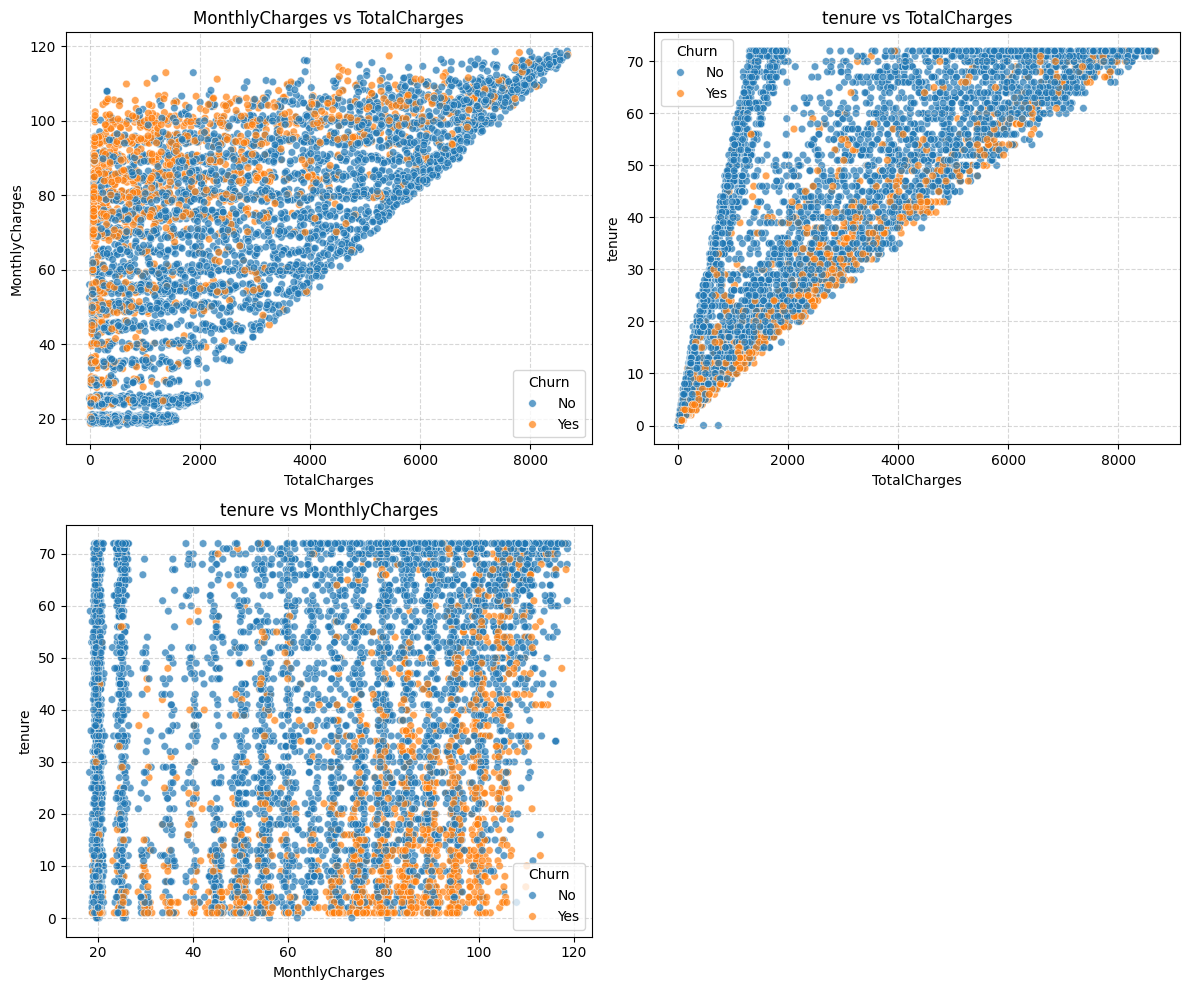


📈 Histograms (Distribution of Numerical Features):


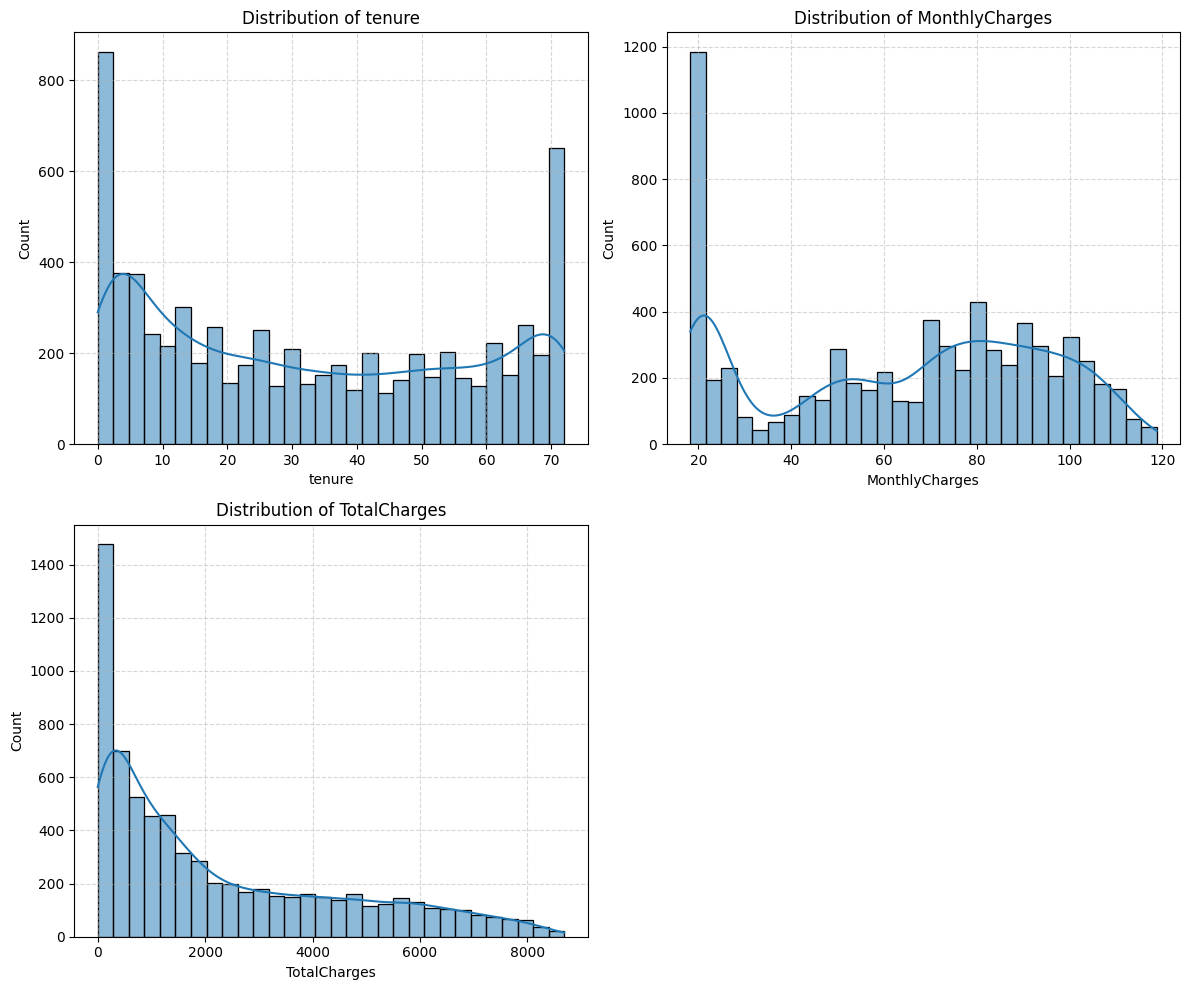


📊 Bar Plots (Categorical Features):


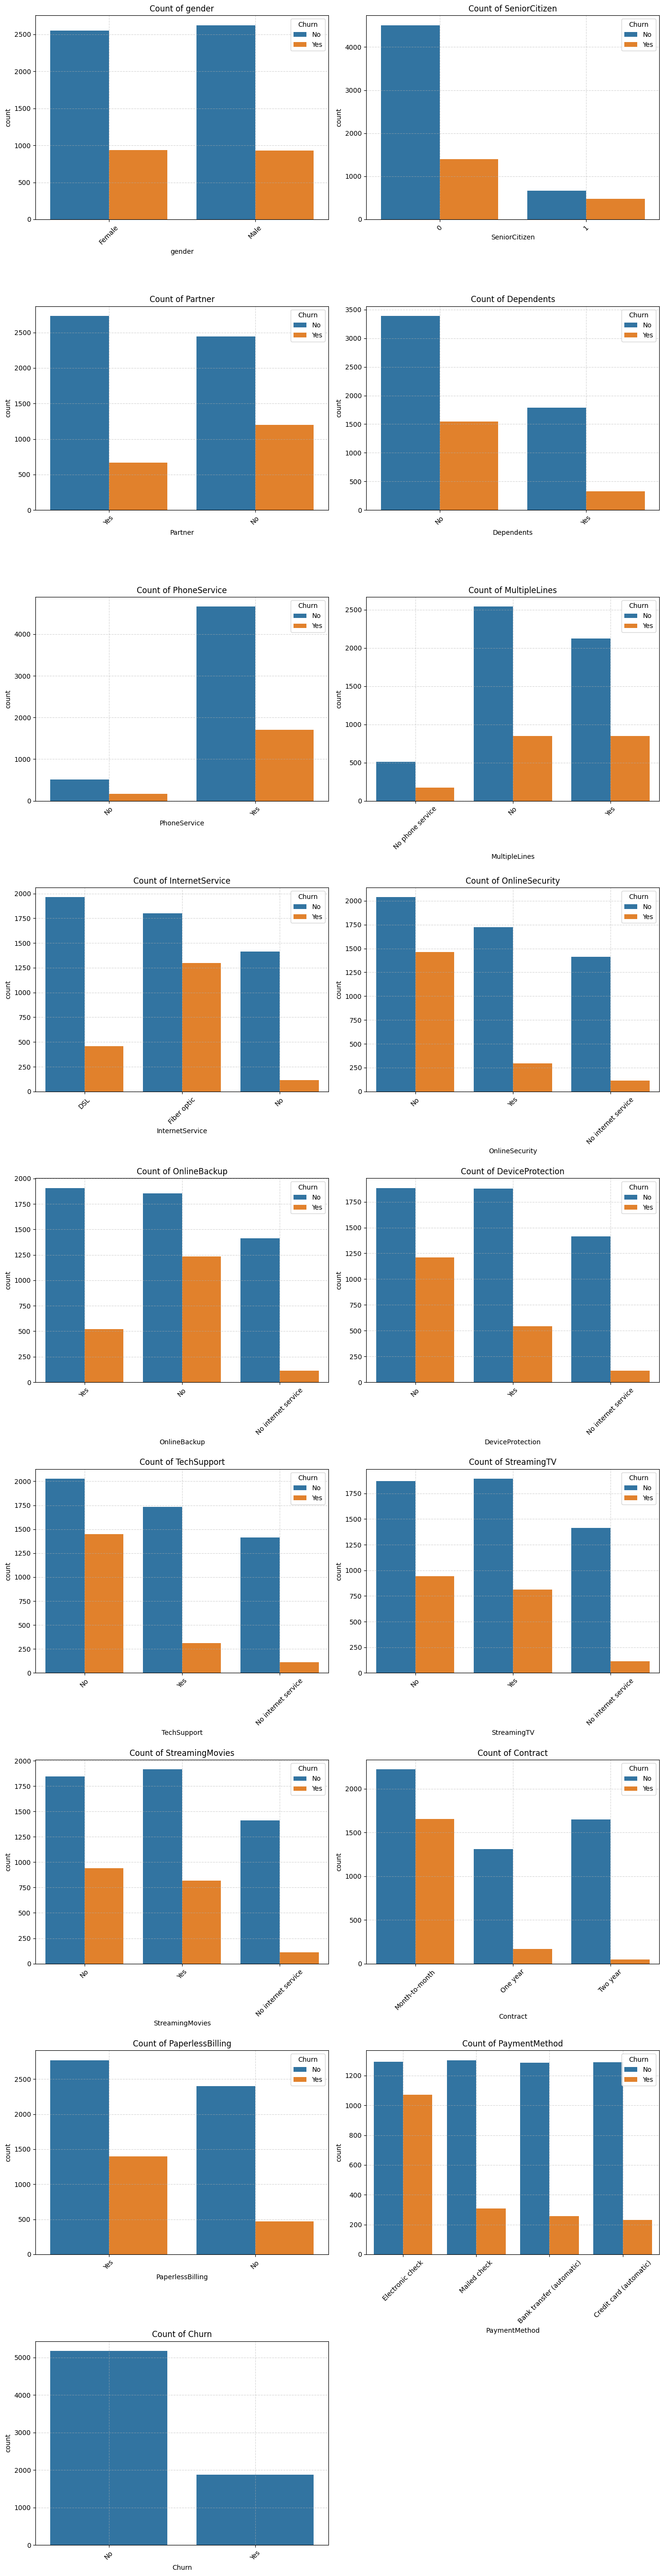


📦 Box Plots (Numerical by Churn):


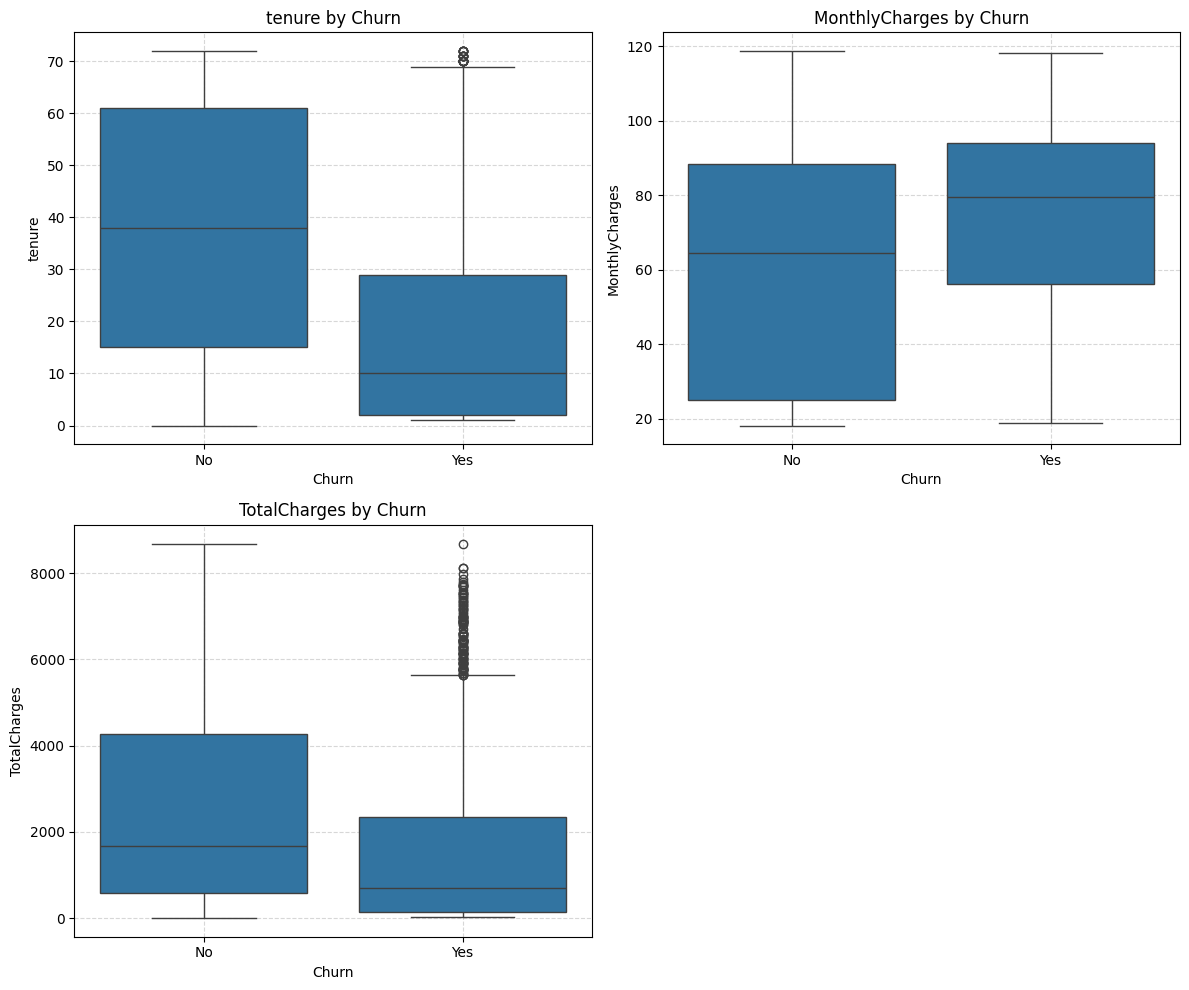

In [143]:
# Scatter plots (pasangan fitur numerik)
print("📊 Scatter Plots (Numerical vs Numerical, colored by Churn):")
plot_scatter_pairs(df, scatter_cols, target='Churn')

# Histograms
print("\n📈 Histograms (Distribution of Numerical Features):")
plot_histograms(df, histogram_cols)

# Bar plots
print("\n📊 Bar Plots (Categorical Features):")
plot_barplots(df, barplot_cols, target='Churn')

# Box plots
print("\n📦 Box Plots (Numerical by Churn):")
plot_boxplots(df, box_plot_cols, target='Churn')

In [144]:
df['TotalCharges'].isna().sum()

np.int64(0)

Min TotalCharges: 0.0


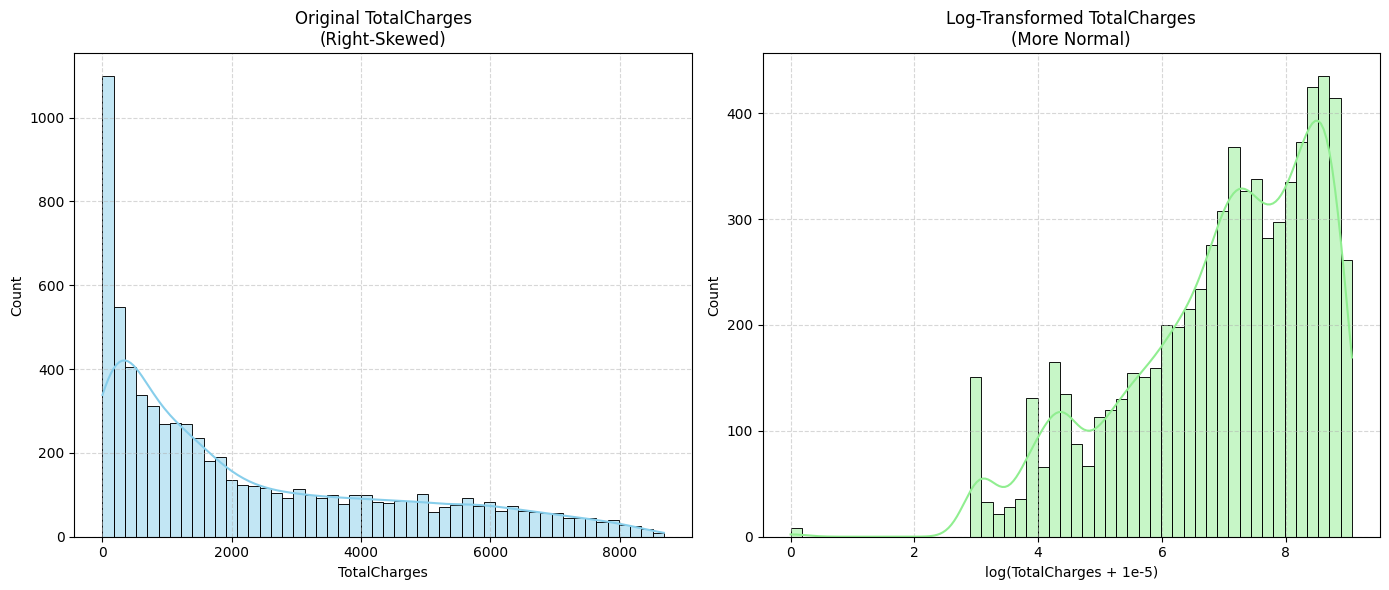


Skewness:
Original TotalCharges: 0.963
Log-Transformed:       -0.802

NaN di TotalCharges_log: 0


In [145]:
# 1. Cek nilai minimum
min_tc = df['TotalCharges'].min()
print(f"Min TotalCharges: {min_tc}")

# 2. Buat log-transformed version
# Gunakan 1e-5 sebagai epsilon kecil jika ada 0
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])

# 3. Plot histogram sebelum vs sesudah
plt.figure(figsize=(14, 6))

# Sebelum
plt.subplot(1, 2, 1)
sns.histplot(df['TotalCharges'], kde=True, bins=50, color='skyblue')
plt.title('Original TotalCharges\n(Right-Skewed)')
plt.xlabel('TotalCharges')
plt.grid(True, linestyle='--', alpha=0.5)

# Sesudah
plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges_log'], kde=True, bins=50, color='lightgreen')
plt.title('Log-Transformed TotalCharges\n(More Normal)')
plt.xlabel('log(TotalCharges + 1e-5)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 4. Opsional: tampilkan skewness
from scipy.stats import skew
print("\nSkewness:")
print(f"Original TotalCharges: {skew(df['TotalCharges']):.3f}")
print(f"Log-Transformed:       {skew(df['TotalCharges_log']):.3f}")

print("\nNaN di TotalCharges_log:", df['TotalCharges_log'].isna().sum())

In [146]:
df['tenure_sq'] = df['tenure'] ** 2

In [147]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

df_clean = df.copy()
cols_to_replace = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in cols_to_replace:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('No phone service', 'No')

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
multi_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor = ColumnTransformer(
    transformers=[
        ('bin', OrdinalEncoder(), binary_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), multi_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

X = df_clean[binary_cols + multi_cols + numeric_cols]
y = df_clean['Churn'].map({'No': 0, 'Yes': 1})

X_processed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(X_processed, columns=feature_names)
df_encoded['Churn'] = y.values

df_encoded['AvgMonthlyCharge'] = df_encoded['num__TotalCharges'] / (df_encoded['num__tenure'] + 1e-5)
df_encoded = df_encoded.drop(columns=['num__TotalCharges','num__MonthlyCharges'])

X_final = df_encoded.drop('Churn', axis=1)

In [148]:
corr = X_final.corr()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = upper.stack().abs() > 0.8
if not high_corr.empty:
    print("Sisa multikolinearitas tinggi:")
    print(upper.stack()[high_corr].sort_values(ascending=False))
else:
    print("✅ Tidak ada multikolinearitas tinggi (|r| > 0.8)")

Sisa multikolinearitas tinggi:
Series([], dtype: float64)


In [149]:
df_encoded.head()

,bin__gender,bin__Partner,bin__Dependents,bin__PhoneService,bin__PaperlessBilling,cat__MultipleLines_Yes,cat__InternetService_Fiber optic,cat__InternetService_No,cat__OnlineSecurity_Yes,cat__OnlineBackup_Yes,...,cat__StreamingMovies_Yes,cat__Contract_One year,cat__Contract_Two year,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,Churn,AvgMonthlyCharge
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,29.849702
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,34.0,0,55.573513
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1,54.074730
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,0,40.905546
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,75.824621


In [150]:
df_encoded.isna().sum()

,0
bin__gender,0
bin__Partner,0
bin__Dependents,0
bin__PhoneService,0
bin__PaperlessBilling,0
cat__MultipleLines_Yes,0
cat__InternetService_Fiber optic,0
cat__InternetService_No,0
cat__OnlineSecurity_Yes,0
cat__OnlineBackup_Yes,0


In [151]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   bin__gender                                 7043 non-null   float64
 1   bin__Partner                                7043 non-null   float64
 2   bin__Dependents                             7043 non-null   float64
 3   bin__PhoneService                           7043 non-null   float64
 4   bin__PaperlessBilling                       7043 non-null   float64
 5   cat__MultipleLines_Yes                      7043 non-null   float64
 6   cat__InternetService_Fiber optic            7043 non-null   float64
 7   cat__InternetService_No                     7043 non-null   float64
 8   cat__OnlineSecurity_Yes                     7043 non-null   float64
 9   cat__OnlineBackup_Yes                       7043 non-null   float64
 10  cat__DeviceP

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan target
Y = df_encoded['Churn']
X = df_encoded.drop(columns='Churn')

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42, 
    stratify=Y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # ✅ FIX: gunakan X_test, bukan X_test_scaled

# Model
model = LogisticRegression(
    class_weight='balanced',  # ← tambahkan ini
    random_state=42,
    max_iter=1000
)
model.fit(X_train_scaled, Y_train)

# Prediksi
Y_pred = model.predict(X_test_scaled)

In [153]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409

